In [64]:
import numpy as np
import pandas as pd
from keras import layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models,layers
import tensorflow as tf


In [79]:
batch_size = 32
img_height = 180
img_width = 180
data_dir="/content/drive/MyDrive/Kaggle Dataset/flowers/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale"
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 4036 files belonging to 5 classes.
Using 2422 files for training.
Found 4036 files belonging to 5 classes.
Using 1614 files for validation.


In [80]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 1), (None, 5)), types: (tf.float32, tf.float32)>

In [81]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32, 5)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(5,  activation='softmax'))

In [99]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [100]:
with tf.device('/device:GPU:0'):
    result = model.fit(
              train_ds,
              validation_data=val_ds,
              epochs=20
)

Epoch 1/20
76/76 [==============================] - 13s 153ms/step - loss: 522.5632 - accuracy: 0.2607 - val_loss: 1.6022 - val_accuracy: 0.2577
Epoch 2/20
76/76 [==============================] - 12s 155ms/step - loss: 1.5988 - accuracy: 0.2749 - val_loss: 1.5961 - val_accuracy: 0.2577
Epoch 3/20
76/76 [==============================] - 12s 152ms/step - loss: 1.5929 - accuracy: 0.2677 - val_loss: 1.5918 - val_accuracy: 0.2577
Epoch 4/20
76/76 [==============================] - 12s 150ms/step - loss: 1.5864 - accuracy: 0.2696 - val_loss: 1.5887 - val_accuracy: 0.2577
Epoch 5/20
76/76 [==============================] - 12s 150ms/step - loss: 1.5829 - accuracy: 0.2668 - val_loss: 1.5867 - val_accuracy: 0.2577
Epoch 6/20
76/76 [==============================] - 12s 149ms/step - loss: 1.5799 - accuracy: 0.2668 - val_loss: 1.5853 - val_accuracy: 0.2577
Epoch 7/20
76/76 [==============================] - 12s 150ms/step - loss: 1.5781 - accuracy: 0.2705 - val_loss: 1.5845 - val_accuracy: 0.25

In [78]:
model.evaluate(val_ds)

51/51 [==============================] - 4s 70ms/step - loss: 1.5839 - accuracy: 0.2577


[1.5839133262634277, 0.2577447295188904]

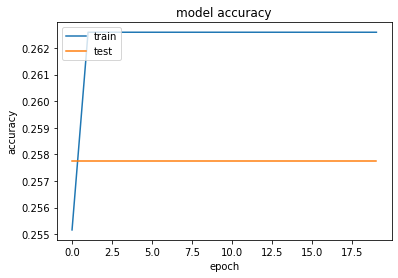

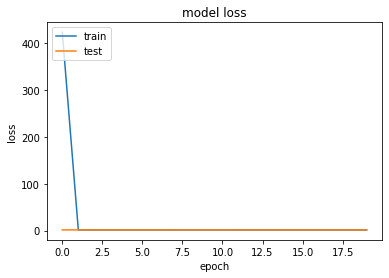

In [76]:

import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()